In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | chagda
City not found. Skipping...
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kogon
Processing Record 20 of Set 1 | serenje
Processing Record 21 of Set 1 | hobart
Processing Record 22 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,-9.99,92,99,5.57,RU,2021-03-27 15:04:13
1,Puerto Ayora,-0.7393,-90.3518,82.40,74,40,9.22,EC,2021-03-27 15:04:13
2,Yulara,-25.2406,130.9889,75.20,69,99,5.75,AU,2021-03-27 15:04:14
3,Norman Wells,65.2820,-126.8329,5.00,85,75,6.91,CA,2021-03-27 15:04:14
4,Sao Filipe,14.8961,-24.4956,71.04,73,3,12.30,CV,2021-03-27 15:04:12
5,Bathsheba,13.2167,-59.5167,84.20,54,40,21.85,BB,2021-03-27 15:04:14
6,Kapaa,22.0752,-159.3190,73.40,78,20,14.97,US,2021-03-27 15:03:33
7,Hami,42.8000,93.4500,58.35,41,100,7.45,CN,2021-03-27 15:04:15
8,Qaanaaq,77.4840,-69.3632,-6.63,68,100,6.78,GL,2021-03-27 15:04:15
9,Cabedelo,-6.9811,-34.8339,84.20,74,75,5.75,BR,2021-03-27 15:04:16


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-03-27 15:04:13,70.6333,147.9167,-9.99,92,99,5.57
1,Puerto Ayora,EC,2021-03-27 15:04:13,-0.7393,-90.3518,82.40,74,40,9.22
2,Yulara,AU,2021-03-27 15:04:14,-25.2406,130.9889,75.20,69,99,5.75
3,Norman Wells,CA,2021-03-27 15:04:14,65.2820,-126.8329,5.00,85,75,6.91
4,Sao Filipe,CV,2021-03-27 15:04:12,14.8961,-24.4956,71.04,73,3,12.30
...,...,...,...,...,...,...,...,...,...
555,Tessalit,ML,2021-03-27 15:06:51,20.1986,1.0114,88.05,4,0,16.96
556,Marsa Matruh,EG,2021-03-27 15:06:51,31.3525,27.2453,60.80,44,40,12.66
557,Maltahohe,NA,2021-03-27 15:06:51,-24.8333,16.9833,80.87,13,0,3.20
558,Auki,SB,2021-03-27 15:06:51,-8.7676,160.7034,78.03,86,99,4.52


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

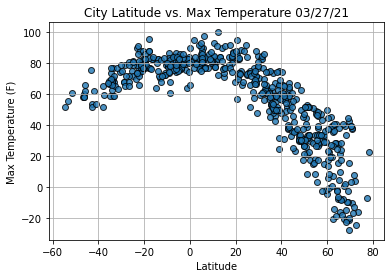

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

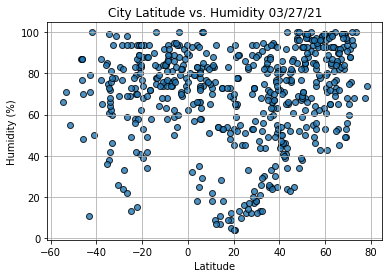

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

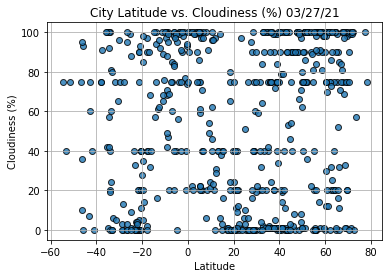

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

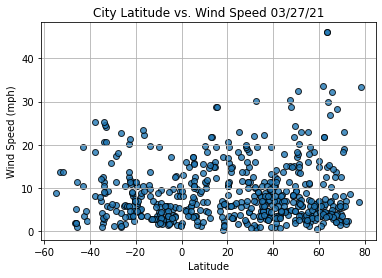

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [20]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                   Butaritari
Country                        KI
Date          2021-03-27 15:04:17
Lat                        3.0707
Lng                        172.79
Max Temp                    80.85
Humidity                       79
Cloudiness                     99
Wind Speed                  14.94
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
555     True
556     True
557    False
558    False
559     True
Name: Lat, Length: 560, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2021-03-27 15:04:13,70.6333,147.9167,-9.99,92,99,5.57
3,3,Norman Wells,CA,2021-03-27 15:04:14,65.2820,-126.8329,5.00,85,75,6.91
4,4,Sao Filipe,CV,2021-03-27 15:04:12,14.8961,-24.4956,71.04,73,3,12.30
5,5,Bathsheba,BB,2021-03-27 15:04:14,13.2167,-59.5167,84.20,54,40,21.85
6,6,Kapaa,US,2021-03-27 15:03:33,22.0752,-159.3190,73.40,78,20,14.97
...,...,...,...,...,...,...,...,...,...,...
553,553,Mamlyutka,KZ,2021-03-27 15:06:50,54.9375,68.5394,26.69,96,100,2.53
554,554,Ahlat,TR,2021-03-27 15:06:50,38.7518,42.4814,24.80,80,84,9.86
555,555,Tessalit,ML,2021-03-27 15:06:51,20.1986,1.0114,88.05,4,0,16.96
556,556,Marsa Matruh,EG,2021-03-27 15:06:51,31.3525,27.2453,60.80,44,40,12.66


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2021-03-27 15:04:13,70.6333,147.9167,-9.99,92,99,5.57
3,3,Norman Wells,CA,2021-03-27 15:04:14,65.2820,-126.8329,5.00,85,75,6.91
4,4,Sao Filipe,CV,2021-03-27 15:04:12,14.8961,-24.4956,71.04,73,3,12.30
5,5,Bathsheba,BB,2021-03-27 15:04:14,13.2167,-59.5167,84.20,54,40,21.85
6,6,Kapaa,US,2021-03-27 15:03:33,22.0752,-159.3190,73.40,78,20,14.97


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

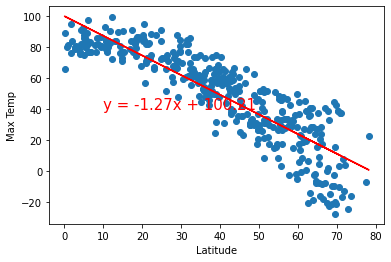

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

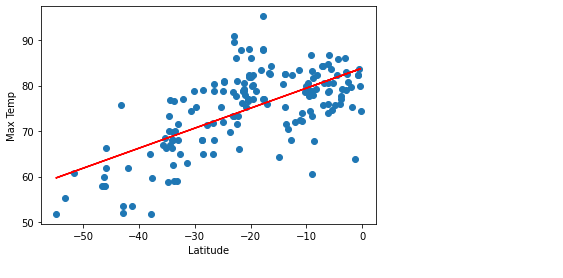

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

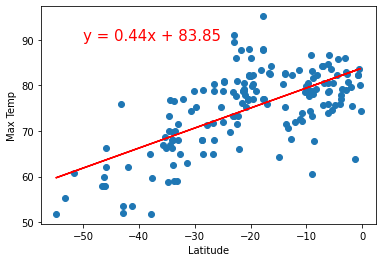

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

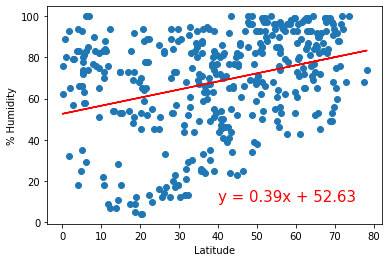

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

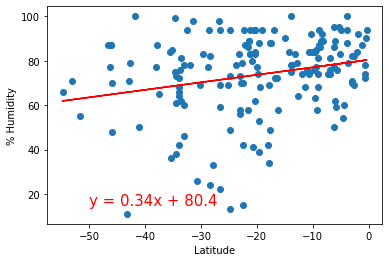

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

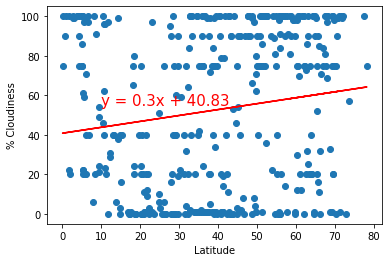

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

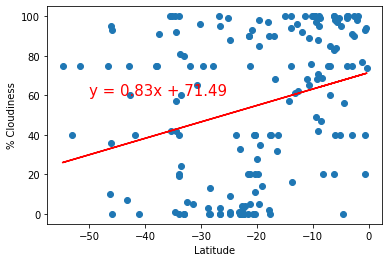

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

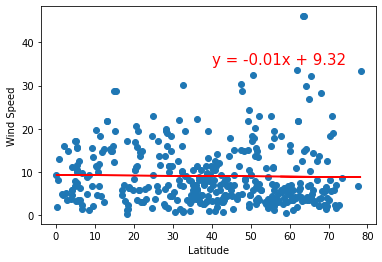

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

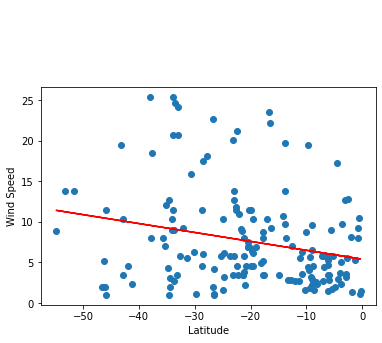

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))